In [16]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm as cm

In [2]:
train_df = pd.read_csv('../data/processed/train_processed.csv')

In [3]:
cols= list(train_df.columns)
cols = cols[4:]
cols.remove('PRO1')
cols.remove('PRO12')

In [5]:
data = train_df[cols]

In [31]:
corr = data.corr(method='pearson')

In [32]:
corr.shape

(35, 35)

In [33]:
plt.matshow(corr)

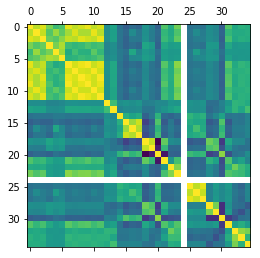

In [34]:
plt.show()

In [26]:
def plotCorrMatrix(data,title='Continuous Feature Correlation Figure 1'):
# 	fig = plt.figure(figsize = (50,50) )
# 	ax1 = fig.add_subplot(111)
	cmap = cm.get_cmap('jet', 30)
	cax = plt.imshow(data.corr(method='pearson'), interpolation="nearest", cmap=cmap)
	plt.grid(True)
	plt.title(title)
	labels=list(data.columns)
# 	plt.set_xticklabels(labels,fontsize=6)
# 	plt.set_yticklabels(labels,fontsize=6)
	# Add colorbar, make sure to specify tick locations to match desired ticklabels
# 	fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
	plt.show()

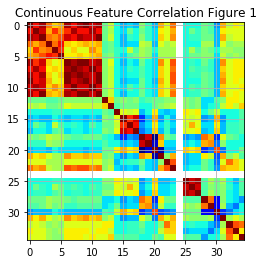

In [27]:
plotCorrMatrix(data)

### Very High Correlation between the first 12 features - which are all temporal. Try removing such features.

In [39]:
cutoff_limit = 0.75
correlated_features = set()
for i in range(0,len(corr.columns)):
    for j in range(i+1,len(corr.columns)):
        if corr.iloc[i,j] >= cutoff_limit or corr.iloc[i,j] <= -cutoff_limit:
            correlated_features.add(corr.iloc[i,0])
            print i, " and ", j, " are correlated"
            break

0  and  1  are correlated
1  and  2  are correlated
2  and  6  are correlated
3  and  5  are correlated
6  and  7  are correlated
7  and  8  are correlated
8  and  9  are correlated
9  and  10  are correlated
10  and  11  are correlated
15  and  17  are correlated
16  and  17  are correlated
18  and  19  are correlated
20  and  21  are correlated
25  and  26  are correlated
26  and  27  are correlated


## Remove 2, 6, 8, 10, 17, 19, 21, 26